In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
sns.set()

In [ ]:
## Why do label or why one-hot:-
1. https://forums.fast.ai/t/to-label-encode-or-one-hot-encode/6057/8
2. https://www.saedsayad.com/encoding.htm

In [119]:
df = pd.read_csv('Big market sales data.csv')
df.loc[df[df['Outlet_Identifier'] == 'OUT045'].index, 'Outlet_Size'] = 'Small'
df.loc[df[df['Outlet_Identifier'] == 'OUT017'].index, 'Outlet_Size'] = 'Small'
df.loc[df[df['Outlet_Identifier'] == 'OUT010'].index, 'Outlet_Size'] = 'Small'
df['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat', inplace = True)
df['Item_Fat_Content'].replace('reg', 'Regular', inplace = True)
df.loc[df[df['Item_Weight'].isna()].index, 'Item_Weight'] = df['Item_Weight'].mean()

In [14]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].map((df.groupby(['Item_Fat_Content'])['Item_Outlet_Sales'].sum()/df.groupby(['Item_Fat_Content'])['Item_Outlet_Sales'].count()).to_dict())
df['Outlet_Type'] = df['Outlet_Type'].map((df.groupby(['Outlet_Type'])['Item_Outlet_Sales'].sum()/df.groupby(['Outlet_Type'])['Item_Outlet_Sales'].count()).to_dict())
df['Outlet_Size'] = df['Outlet_Size'].map((df.groupby(['Outlet_Size'])['Item_Outlet_Sales'].sum()/df.groupby(['Outlet_Size'])['Item_Outlet_Sales'].count()).to_dict())
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].map((df.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].sum()/df.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].count()).to_dict())
df['Item_Type'] = df['Item_Type'].map((df.groupby(['Item_Type'])['Item_Outlet_Sales'].sum()/df.groupby(['Item_Type'])['Item_Outlet_Sales'].count()).to_dict())
df['Outlet_Identifier_encoded'] = df['Outlet_Identifier'].map((df.groupby(['Outlet_Identifier'])['Item_Identifier'].count()/df['Item_Identifier'].nunique()).to_dict())
# df = pd.merge(df, df.groupby(['Outlet_Identifier', 'Item_Type'])['Item_Outlet_Sales'].mean().reset_index(), on = ['Outlet_Identifier', 'Item_Type'], suffixes=['', '_mean'])


(8523, 12)

In [3]:
#############################################################################

In [49]:
df = pd.read_csv('Big market sales data.csv')
df.loc[df[df['Outlet_Identifier'] == 'OUT045'].index, 'Outlet_Size'] = 'Small'
df.loc[df[df['Outlet_Identifier'] == 'OUT017'].index, 'Outlet_Size'] = 'Small'
df.loc[df[df['Outlet_Identifier'] == 'OUT010'].index, 'Outlet_Size'] = 'Small'
df['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat', inplace = True)
df['Item_Fat_Content'].replace('reg', 'Regular', inplace = True)
df.loc[df[df['Item_Weight'].isna()].index, 'Item_Weight'] = df['Item_Weight'].mean()
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [50]:
# df['Item_Fat_Content'] = df['Item_Fat_Content'].map((df.groupby(['Item_Fat_Content'])['Item_Outlet_Sales'].sum()/df.groupby(['Item_Fat_Content'])['Item_Outlet_Sales'].count()).to_dict())
df['Outlet_Type'] = df['Outlet_Type'].map((df.groupby(['Outlet_Type'])['Item_Outlet_Sales'].sum()/df.groupby(['Outlet_Type'])['Item_Outlet_Sales'].count()).to_dict())
# df['Outlet_Size'] = df['Outlet_Size'].map((df.groupby(['Outlet_Size'])['Item_Outlet_Sales'].sum()/df.groupby(['Outlet_Size'])['Item_Outlet_Sales'].count()).to_dict())
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].map((df.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].sum()/df.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].count()).to_dict())
df['Item_Type'] = df['Item_Type'].map((df.groupby(['Item_Type'])['Item_Outlet_Sales'].sum()/df.groupby(['Item_Type'])['Item_Outlet_Sales'].count()).to_dict())
df['Outlet_Identifier_encoded'] = df['Outlet_Identifier'].map((df.groupby(['Outlet_Identifier'])['Item_Identifier'].count()/df['Item_Identifier'].nunique()).to_dict())
# df = pd.merge(df, df.groupby(['Outlet_Identifier', 'Item_Type'])['Item_Outlet_Sales'].mean().reset_index(), on = ['Outlet_Identifier', 'Item_Type'], suffixes=['', '_mean'])


In [88]:
df['Outlet_Size'] = df['Outlet_Size'].map((df.groupby(['Outlet_Size'])['Item_Outlet_Sales'].sum()/df.groupby(['Outlet_Size'])['Item_Outlet_Sales'].count()).to_dict())

In [5]:
df.corr()['Item_Outlet_Sales'].sort_values(ascending = False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Outlet_Type                  0.489464
Outlet_Identifier_encoded    0.415103
Outlet_Location_Type         0.111828
Item_Type                    0.068843
Item_Weight                  0.011550
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

In [32]:
pred = model.predict(x_test)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))
print(model.feature_importances_)
print(np.sqrt(metrics.mean_squared_error(y_test, pred)))

0.6125148116162787
0.5785179162921391
[0.52443589 0.47556411]
1079.043667671077


In [6]:
x = df[['Item_MRP', 'Outlet_Type', 'Outlet_Identifier_encoded','Outlet_Location_Type']]
y = df['Item_Outlet_Sales']
x_train,x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)

In [94]:
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

# Choose the type of classifier. 
model = DecisionTreeRegressor(random_state = 42)

# Choose some parameter combinations to try
# learning_rate = [0.01, 0.05, 0.1, 0.5, 1,1.5] # 8
criterion = ['mse', 'friedman_mse', 'mae']
splitter = ['best', 'random']
n_estimators = [120, 160, 200,210,220,230,240]
max_depth = [4,5, 6, 8, 9,10,11]
max_features = ['auto', 'sqrt', 'log2']
min_samples_leaf = [8,10,11,13,15,16,17,18]
max_leaf_nodes = [2,4,6,8]
parameters = {'criterion':criterion , 'splitter':splitter, 'max_depth': max_depth,
               'max_features': max_features, 'min_samples_leaf': min_samples_leaf, 'max_leaf_nodes':max_leaf_nodes }



# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(mean_squared_error, greater_is_better = False)

# Run the grid search
grid_obj = RandomizedSearchCV(estimator = model, param_distributions = parameters, scoring=acc_scorer, cv = 4)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
model = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
model.fit(x_train, y_train)
print(model)
print()
pred = model.predict(x_test)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))
print(model.feature_importances_)
print(np.sqrt(metrics.mean_squared_error(y_test, pred)))

DecisionTreeRegressor(criterion='mae', max_depth=5, max_features='log2',
                      max_leaf_nodes=8, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=11,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

0.5283929150517941
0.5482585877006932
[0.49682207 0.40408636 0.09909157 0.        ]
1108.0702308430991


In [82]:
#################################################

## Decision Tree Result:-

In [ ]:
x = df[['Item_MRP', 'Outlet_Type', 'Outlet_Identifier_encoded']]
DecisionTreeRegressor(criterion='mae', max_depth=6, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=11,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='random')

0.5831255736854395
0.600818503048899
[0.56743994 0.07690244 0.35565763]
1041.6157448216434

In [ ]:
x = df[['Item_MRP', 'Outlet_Type','Outlet_Size', 'Outlet_Identifier_encoded']]
DecisionTreeRegressor(criterion='mae', max_depth=5, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=11,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

0.5957975922951524
0.6075880875103671
[0.53667847 0.02494471 0.         0.43837682]
1032.7457731361785

In [ ]:
x = df[['Item_MRP', 'Outlet_Type', 'Outlet_Identifier_encoded']]
DecisionTreeRegressor(criterion='mse', max_depth=6, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

0.60900078177402
0.6096935702209327
[0.55407474 0.29229722 0.15362804]
1029.9714524915466

In [ ]:
x = df[['Item_MRP', 'Outlet_Type', 'Outlet_Identifier_encoded','Outlet_Location_Type']]

DecisionTreeRegressor(criterion='mse', max_depth=11, max_features='sqrt',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='random')

0.6072173847435747
0.6107659070171118
[0.55152357 0.1763715  0.26951891 0.00258602]
1028.5555957915938

In [ ]:
DecisionTreeRegressor(criterion='mse', max_depth=10, max_features='log2',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=16,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='random')

0.6050051888581851
0.6088066202551936
[0.55268166 0.08927352 0.35059927 0.00744555]
1031.141065230656

In [92]:
#################################################

In [4]:
x = df[['Item_MRP', 'Outlet_Type', 'Outlet_Identifier_encoded','Outlet_Location_Type']]
y = df['Item_Outlet_Sales']
x_train,x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)

In [182]:
model = GradientBoostingRegressor(criterion='mse', max_depth=4, max_features='sqrt',learning_rate = 0.045,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=18,
                      min_samples_split=2, min_weight_fraction_leaf=0.0, random_state=42)

In [183]:
model.fit(x_train, y_train)
pred = model.predict(x_test)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))
print(model.feature_importances_)
print(np.sqrt(metrics.mean_squared_error(y_test, pred)))

0.6156653465490388
0.6158345906495906
[0.57369543 0.22142208 0.20332995 0.00155254]
1021.8366225791542


In [129]:
################################################################################

In [ ]:
                          (alpha=0.9, criterion='mse',
                          learning_rate=0.038, loss='ls', max_depth=4,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_samples_leaf=10, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100)

0.6138263956563257
0.6166871921010599
[0.5730965  0.19799029 0.22770421 0.001209  ]
1020.7020809325928

In [ ]:
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse',
                          learning_rate=0.03, loss='ls', max_depth=4,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_samples_leaf=8, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100)
                         
0.6084618600181806
0.6147358863016692
[0.57121952 0.19978592 0.22802662 0.00096794]
1023.2967940796475
--------------------------------------------------------------------------------------------------

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.03, loss='ls', max_depth=5,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=11, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=130,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

0.6222596386586878
0.6123785182733856
[0.58030427 0.22241256 0.19650157 0.0007816 ]
1026.4227123902504

In [305]:
--------------------------------------------------------------------------

In [309]:
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

# Choose the type of classifier. 
model = GradientBoostingRegressor(random_state = 42)

# Choose some parameter combinations to try
learning_rate = [0.03, 0.035, 0.038,  1]
n_estimators = [110, 130, 140, 145,150]
max_depth = [4, 5, 6]
min_samples_leaf = [9,10,11,14]
min_weight_fraction_leaf = [0.1, 0.05, 0.18]
max_leaf_nodes = [6,8,9,10]


parameters = {'learning_rate': learning_rate, 'n_estimators':n_estimators,'max_depth': max_depth, 
              'min_samples_leaf': min_samples_leaf, 'min_weight_fraction_leaf':min_weight_fraction_leaf}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(mean_squared_error, greater_is_better = False)

# Run the grid search
grid_obj = RandomizedSearchCV(estimator = model, param_distributions = parameters, scoring=acc_scorer, cv = 4)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
model = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
model.fit(x_train, y_train)
print(model)
print()
pred = model.predict(x_test)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))
print(model.feature_importances_)
print(np.sqrt(metrics.mean_squared_error(y_test, pred)))

In [6]:
#################################################################################

In [54]:
x = df[['Item_MRP', 'Outlet_Type', 'Outlet_Identifier_encoded','Outlet_Location_Type']]
y = df['Item_Outlet_Sales']
x_train,x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)

In [55]:
model = GradientBoostingRegressor(alpha=0.9, criterion='mse',
                          learning_rate=0.038, loss='ls', max_depth=4,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_samples_leaf=10, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=110, random_state = 42)

In [56]:
model.fit(x_train, y_train)
pred = model.predict(x_test)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))
print(model.feature_importances_)
print(np.sqrt(metrics.mean_squared_error(y_test, pred)))

0.6155214825155297
0.6165392807312119
[0.57388799 0.19751046 0.22728267 0.00131889]
1020.8989943652037


In [ ]:
## Model jis jis data point ke liye jyada error de rha h us part ko pkdo to hme ye milega ki jinn feature ko lekr
## ham model bna rhe h wo us part ke liye shi nhi h ya jyada shi nhi h ya un se jyada effective koi or feature h jo us
## data ke liye target feature se jyada related h to ab ya to us feature ko bi us model me lekr uska kissi trah weight bda kr
## ya us se related koi feature bna kr ya Phir us data ko lekr ek or model bna lo jiss me wo feature lo jo us particuler data
## ke liye related h so phle us data pr bi acche se EDA kro
# Best Perameter choose kro, tuning kro, phir peramteter tune kro toda or feature engineering, model ke max error part ko lo
# us me corr dekk or eda kro 

In [ ]:
0.6135253947331183
0.6210367871036687
[0.56904145 0.1493891  0.19444195 0.01190484 0.00324488 0.07197778]
1014.8944127352011
alpha=0.9, criterion='mse',
                          learning_rate=0.039, loss='ls', max_depth=5,
                          max_features='sqrt', max_leaf_nodes=9,
                          min_samples_leaf=11, min_samples_split=2,
                          min_weight_fraction_leaf=0.018, n_estimators=156,

In [6]:
x = df[['Item_MRP', 'Outlet_Type', 'Outlet_Identifier_encoded','Outlet_Location_Type', 'Item_Type','Outlet_Establishment_Year']]
y = df['Item_Outlet_Sales']
x_train,x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)

model = GradientBoostingRegressor(alpha=0.9, criterion='mse',
                          learning_rate=0.03831, loss='ls', max_depth=4,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_samples_leaf=13, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=150, random_state = 42)

model.fit(x_train, y_train)
pred = model.predict(x_test)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))
print(model.feature_importances_)
print(np.sqrt(metrics.mean_squared_error(y_test, pred)))
# 0.6199273088429499
# 0.6195019028796055
# [0.57075229 0.17614554 0.18426108 0.01125856 0.00600452 0.051578  ]
# 1016.9476084724595


0.6199273088429499
0.6195019028796055
[0.57075229 0.17614554 0.18426108 0.01125856 0.00600452 0.051578  ]
1016.9476084724595


In [ ]:
x = df[['Item_MRP', 'Outlet_Type', 'Outlet_Identifier_encoded','Item_Type','Item_Visibility']]
y = df['Item_Outlet_Sales']
x_train,x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)

model = RandomForestRegressor(random_state = 42, criterion = 'mse', max_depth = 6, min_samples_leaf = 10,
                              max_features = 'auto', n_estimators = 80)

model.fit(x_train, y_train)
pred = model.predict(x_test)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))
print(model.feature_importances_)
print(np.sqrt(metrics.mean_squared_error(y_test, pred)))


In [69]:
result = pd.DataFrame({'Real':y_test, 'Pred': pred})
result['error'] = result['Real'] - result['Pred']
result.head(2)

,Pred,Real,error
7503,1232.068938,1743.0644,510.995462
2957,655.313929,356.8688,-298.445129


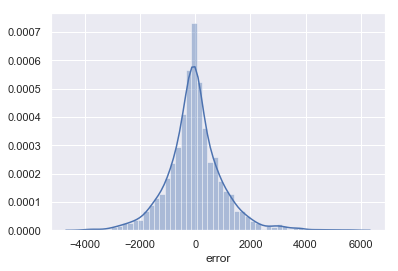

In [70]:
sns.distplot(result['error'])

In [71]:
print(result.shape)
result1 = result[(result['error'] > -2000) & (result['error'] < 2000)]
print(result1.shape)
np.sqrt(metrics.mean_squared_error(result1['Pred'], result1['Real']))

(1705, 3)
(1601, 3)


762.4938728705243

In [87]:
error_index = result[(result['error'] < -2000) | (result['error'] > 2000)].index
df1 = df.loc[error_index]

In [73]:
df1.shape

(104, 12)

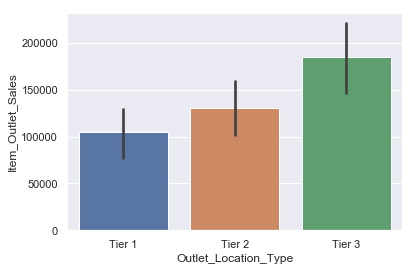

In [77]:
sns.barplot(df1['Outlet_Location_Type'], df1['Item_Outlet_Sales'], estimator = sum) # as same as all data distribution

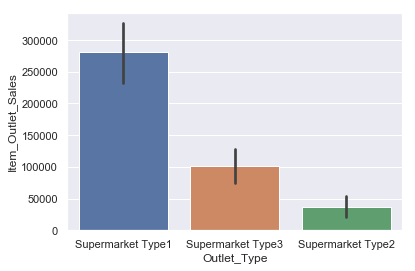

In [80]:
sns.barplot(df1['Outlet_Type'], df1['Item_Outlet_Sales'], estimator = sum) # sup3 > sup2

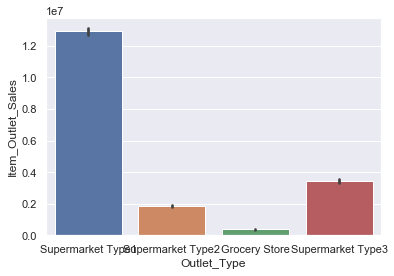

In [84]:
sns.barplot(df['Outlet_Type'], df['Item_Outlet_Sales'], estimator = sum)

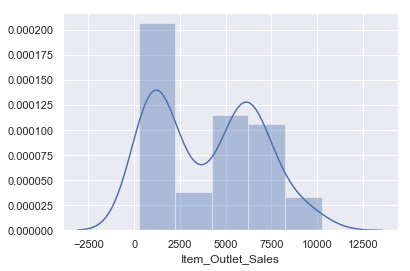

In [81]:
sns.distplot(df1['Item_Outlet_Sales'])

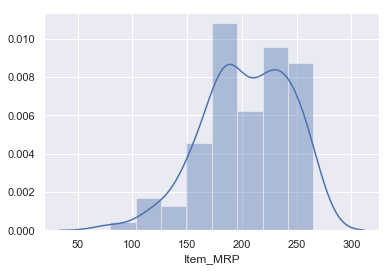

In [83]:
sns.distplot(df1['Item_MRP'])

In [88]:
df.corr()['Item_Outlet_Sales'].sort_values(ascending = False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Outlet_Type                  0.489464
Outlet_Size                  0.218555
Outlet_Location_Type         0.111828
Item_Type                    0.068843
Item_Fat_Content             0.018719
Item_Weight                  0.011550
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

In [233]:
df.corr()['Item_Outlet_Sales'].sort_values(ascending = False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Outlet_Type                  0.489464
Outlet_Size                  0.218555
Outlet_Location_Type         0.111828
Item_Type                    0.068843
Item_Fat_Content             0.018719
Item_Weight                  0.011550
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

In [231]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].map((df.groupby(['Item_Fat_Content'])['Item_Outlet_Sales'].sum()/df.groupby(['Item_Fat_Content'])['Item_Outlet_Sales'].count()).to_dict())
df['Outlet_Type'] = df['Outlet_Type'].map((df.groupby(['Outlet_Type'])['Item_Outlet_Sales'].sum()/df.groupby(['Outlet_Type'])['Item_Outlet_Sales'].count()).to_dict())
df['Outlet_Size'] = df['Outlet_Size'].map((df.groupby(['Outlet_Size'])['Item_Outlet_Sales'].sum()/df.groupby(['Outlet_Size'])['Item_Outlet_Sales'].count()).to_dict())
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].map((df.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].sum()/df.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].count()).to_dict())
df['Item_Type'] = df['Item_Type'].map((df.groupby(['Item_Type'])['Item_Outlet_Sales'].sum()/df.groupby(['Item_Type'])['Item_Outlet_Sales'].count()).to_dict())


In [101]:
df.groupby(['Outlet_Type'])['Item_Outlet_Sales'].sum()

Outlet_Type
Grocery Store        3.680343e+05
Supermarket Type1    1.291734e+07
Supermarket Type2    1.851823e+06
Supermarket Type3    3.453926e+06
Name: Item_Outlet_Sales, dtype: float64

In [116]:
df.groupby(['Outlet_Type'])['Item_Identifier'].count()

Outlet_Type
Grocery Store        1083
Supermarket Type1    5577
Supermarket Type2     928
Supermarket Type3     935
Name: Item_Identifier, dtype: int64

In [118]:
dict_ = {}
for i in set(df['Outlet_Type']):
    dict_[i] = df[df['Outlet_Type'] == i]['Item_Identifier'].nunique()
dict_

{'Grocery Store': 901,
 'Supermarket Type1': 1550,
 'Supermarket Type2': 928,
 'Supermarket Type3': 935}

In [125]:
for i in set(df['Outlet_Type']):
    print(df[df['Outlet_Type'] == i]['Item_Identifier'].shape)

(928,)
(5577,)
(935,)
(1083,)


In [120]:
df1 = df.copy()

In [121]:
df1['Outlet_Type'] = df['Outlet_Type'].map(dict_)

### Item_Type
jis item_type me jistne jyada trah ke product hoge uski sale utni hi jyada hogi

In [166]:
for i in set(df['Item_Type']):
    print(i,df[df['Item_Type'] == i]['Item_Identifier'].nunique())

Soft Drinks 80
Health and Hygiene 95
Breads 45
Breakfast 20
Seafood 10
Baking Goods 119
Hard Drinks 40
Fruits and Vegetables 220
Dairy 125
Household 170
Frozen Foods 155
Snack Foods 220
Starchy Foods 30
Meat 80
Canned 120
Others 30


In [163]:
dict_ = {}
for i in set(df['Item_Type']):
    dict_[i] = [df[df['Item_Type'] == i]['Item_Identifier'].nunique(),df[df['Item_Type'] == i]['Item_Outlet_Sales'].sum()]
temp =pd.DataFrame(dict_)
temp = temp.T
temp.rename(columns = {0:'nu of items in every item_type', 1: 'total sale by them'}, inplace = True)
temp.sort_values(by=['nu of items in every item_type'], ascending = False )

,nu of items in every item_type,total sale by them
Fruits and Vegetables,220.0,2.820060e+06
Snack Foods,220.0,2.732786e+06
Household,170.0,2.055494e+06
Frozen Foods,155.0,1.825735e+06
Dairy,125.0,1.522594e+06
Canned,120.0,1.444151e+06
Baking Goods,119.0,1.265525e+06
Health and Hygiene,95.0,1.045200e+06
Meat,80.0,9.175656e+05
Soft Drinks,80.0,8.928977e+05


#### shi h yha jitne jyada verity h kissi item_type me utni hi total achi sale huee h 

In [170]:
df1['Item_Type'] = df1['Item_Type'].map(temp['nu of items in every item_type'].to_dict())

In [173]:
df1['Outlet_Size'] = df1['Outlet_Size'].map((df1.groupby(['Outlet_Size'])['Item_Outlet_Sales'].sum()/df1.groupby(['Outlet_Size'])['Item_Outlet_Sales'].count()).to_dict())

In [174]:
df1.corr()['Item_Outlet_Sales'].sort_values(ascending = False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Outlet_Size                  0.218555
Outlet_Type                  0.122018
Item_Type                    0.038250
Item_Weight                  0.011550
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

#### Not related diretly but by adding effect of outlet_size and location it has good relation

In [190]:
df1['Outlet_size+Item_Type'] = df1['Outlet_Size'] + df1['Item_Type']

In [191]:
df1.corr()['Item_Outlet_Sales'].sort_values(ascending = False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Outlet_size+Item_Type        0.221581
Outlet_Size                  0.218555
Outlet_Type                  0.122018
Item_Type                    0.038250
Item_Weight                  0.011550
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

### Item_Location_Type
Wo city jyada bdi and achi sale degi jga outlet jyada hoge or un outlet pr saman kitti trah ka milta h ho skta h glosery store hi ho 4 but saman me verity na ho to wo itta shi city nhi hoga

Measure sale in location = nu of outlet in city * varity of items at every outlet

In [184]:
df1.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].sum()

Outlet_Location_Type
Tier 1    4.482059e+06
Tier 2    6.472314e+06
Tier 3    7.636753e+06
Name: Item_Outlet_Sales, dtype: float64

In [205]:
df1.groupby(['Outlet_Location_Type','Outlet_Identifier'])['Item_Identifier'].count().reset_index()

,Outlet_Location_Type,Outlet_Identifier,Item_Identifier
0,Tier 1,OUT019,528
1,Tier 1,OUT046,930
2,Tier 1,OUT049,930
3,Tier 2,OUT017,926
4,Tier 2,OUT035,930
5,Tier 2,OUT045,929
6,Tier 3,OUT010,555
7,Tier 3,OUT013,932
8,Tier 3,OUT018,928
9,Tier 3,OUT027,935


In [209]:
df1.groupby(['Outlet_Location_Type'])['Outlet_Identifier'].nunique()

Outlet_Location_Type
Tier 1    3
Tier 2    3
Tier 3    4
Name: Outlet_Identifier, dtype: int64

In [218]:
df1.groupby(['Outlet_Location_Type','Outlet_Identifier'])['Item_Identifier'].count().reset_index().groupby('Outlet_Location_Type')['Item_Identifier'].sum()

Outlet_Location_Type
Tier 1    2388
Tier 2    2785
Tier 3    3350
Name: Item_Identifier, dtype: int64

In [219]:
df1.groupby(['Outlet_Location_Type','Outlet_Identifier'])['Item_Identifier'].count().reset_index().groupby('Outlet_Location_Type')['Item_Identifier'].sum()*df1.groupby(['Outlet_Location_Type'])['Outlet_Identifier'].nunique()

Outlet_Location_Type
Tier 1     7164
Tier 2     8355
Tier 3    13400
dtype: int64

In [221]:
df1.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].sum()

Outlet_Location_Type
Tier 1    4.482059e+06
Tier 2    6.472314e+06
Tier 3    7.636753e+06
Name: Item_Outlet_Sales, dtype: float64

#### so this hypothesis is true we can see total sale of every location is depends on nu of outlet and nu of verity in 
#### items at there outlets

In [228]:
df1['Outlet_Location_Type'] = df1['Outlet_Location_Type'].map((df1.groupby(['Outlet_Location_Type','Outlet_Identifier'])['Item_Identifier'].count().reset_index().groupby('Outlet_Location_Type')['Item_Identifier'].sum()*df1.groupby(['Outlet_Location_Type'])['Outlet_Identifier'].nunique()).to_dict())